# Logistic Regression

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [82]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving ex2data1.txt to ex2data1 (1).txt
Saving ex2data2.txt to ex2data2 (1).txt
User uploaded file "ex2data1.txt" with length 3775 bytes
User uploaded file "ex2data2.txt" with length 2233 bytes


## Getting the Data

In [0]:
def get_data(filename, seperator):
  if filename[-4:]=='.txt':
    df = pd.read_csv(filename, sep=seperator, header=None)
    m = len(df)        
    X = df[df.columns[:-1]]
    y = df[df.columns[-1]].to_numpy().reshape(m,1)
#    onez = np.ones((m,1))
#    X = np.hstack((onez, X))
    return X, y, m

## Visualizing the Data

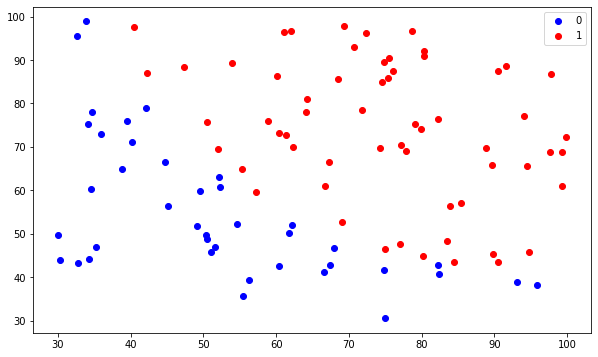

In [138]:
X, y, m = get_data("ex2data1.txt", ',')
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][0], X[y == 0][1], color='b', label='0')
plt.scatter(X[y == 1][0], X[y == 1][1], color='r', label='1')
plt.legend();

In [0]:
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False, regularization=False, reg_lambdaa=0.3):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
        self.regularization = regularization
        self.lambdaa = reg_lambdaa

    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # weights initialization
        self.theta = np.zeros((X.shape[1],1))
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)

            m = y.size


            gradient = np.dot(X.T, (h - y)) / m

#            reg            
#            self.theta = self.theta * (1 - self.lr * (self.lambdaa / m)) - (self.lr * gradient)
#            no reg
#            self.theta = self.theta - (self.lr * gradient)

            if (self.regularization == True):
                self.theta = self.theta * (1 - self.lr * (self.lambdaa / m))
            
            self.theta -= self.lr * gradient
            
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            loss = self.__loss(h, y)

            if (self.regularization == True):
                penalty = (self.lambdaa/(2*len(y))) * np.sum(np.square(self.theta))
                loss = loss + penalty
                
            if(self.verbose == True and i % 50000 == 0):
                # print('penalty= ',penalty)
                print('Iter: {} loss: {} \t'.format(i, loss))
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)

        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X):
        return self.predict_prob(X).round()

    def predict_value(self, X):
        return self.predict_prob(X)

    def get_params(self):
        return self.theta

## Training the Model

In [139]:
model = LogisticRegression(lr=0.0013, num_iter=3000000, verbose=True)
%time model.fit(X, y)

Iter: 0 loss: 0.7810770510404735 	
Iter: 50000 loss: 0.48636145635600164 	
Iter: 100000 loss: 0.35300613569804234 	
Iter: 150000 loss: 0.3154833646094583 	
Iter: 200000 loss: 0.2922880618506209 	
Iter: 250000 loss: 0.2764946138885583 	
Iter: 300000 loss: 0.2650276089084765 	
Iter: 350000 loss: 0.2563157897471435 	
Iter: 400000 loss: 0.2494715338639345 	
Iter: 450000 loss: 0.2439544178915657 	
Iter: 500000 loss: 0.23941584657198167 	
Iter: 550000 loss: 0.235620425711389 	
Iter: 600000 loss: 0.23240318711947747 	
Iter: 650000 loss: 0.22964491451238206 	
Iter: 700000 loss: 0.22725720571778266 	
Iter: 750000 loss: 0.22517305487363115 	
Iter: 800000 loss: 0.22334070628460914 	
Iter: 850000 loss: 0.2217195224073122 	
Iter: 900000 loss: 0.22027713318299078 	
Iter: 950000 loss: 0.21898742424978274 	
Iter: 1000000 loss: 0.21782908840309823 	
Iter: 1050000 loss: 0.21678456380751943 	
Iter: 1100000 loss: 0.21583924313887798 	
Iter: 1150000 loss: 0.21498087596517898 	
Iter: 1200000 loss: 0.2141991

## Accuracy

In [140]:
preds = model.predict(X)
(preds == y).mean()

0.89

In [141]:
model.theta

array([[-22.20849042],
       [  0.182625  ],
       [  0.17757141]])

## Plotting the Decision Boundary

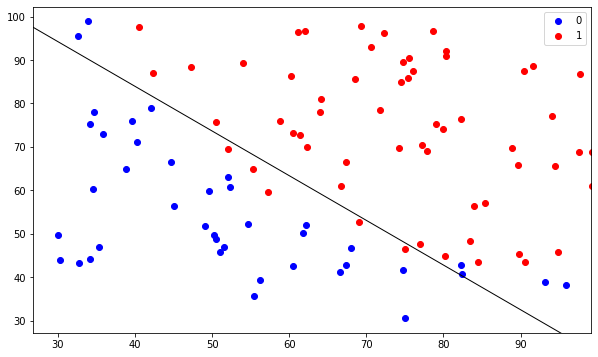

In [142]:
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][0], X[y == 0][1], color='b', label='0')
plt.scatter(X[y == 1][0], X[y == 1][1], color='r', label='1')
plt.legend()

ax = plt.gca()
ax.autoscale(False)

x1_min, x1_max = X[0].min()-5, X[0].max()+5,
x2_min, x2_max = X[1].min()-5, X[1].max()+5,
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = model.predict_prob(grid).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black');
plt.show()

## Predicting Values

In [90]:
praa = model.predict_value(np.array([[45, 85]]))
praa

array([[0.75086006]])

# Regularized Logistic Regression

## Getting the Data
## Visualizing the Data

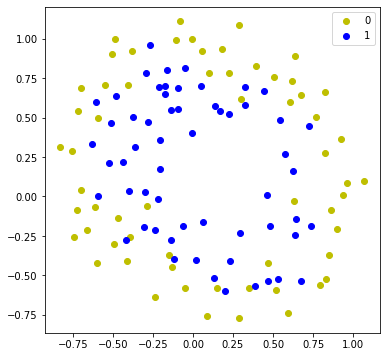

In [91]:
X, y, m = get_data("ex2data2.txt", ',')
plt.figure(figsize=(6, 6))
plt.scatter(X[y == 0][0], X[y == 0][1], color='y', label='0')
plt.scatter(X[y == 1][0], X[y == 1][1], color='b', label='1')
plt.legend();

## Introducing Polynomial Features

In [92]:
polynomial_features = [(i,high-i) for high in range(1,7) for i in range(high,-1, -1)]
polynomial_features = polynomial_features[2:]
#polynomial_features.append((0,0))
print(len(polynomial_features))

25


In [93]:
newX = X
i=0
for ft in polynomial_features:
  newX[str(i)] = (X[0] ** ft[0]) * (X[1] ** ft[1])
  i = i + 1

X = newX
X.shape

(118, 27)

## Training the Models

## Lambda = 0

In [123]:
model = LogisticRegression(lr=1, num_iter=1500000, verbose=True, regularization=True, reg_lambdaa=0)
%time model.fit(X, y)

Iter: 0 loss: 0.681237315087989 	
Iter: 50000 loss: 0.29963873639874306 	
Iter: 100000 loss: 0.2938030390837169 	
Iter: 150000 loss: 0.2906096398541928 	
Iter: 200000 loss: 0.28842567957602516 	
Iter: 250000 loss: 0.2867785641168251 	
Iter: 300000 loss: 0.2854636232405871 	
Iter: 350000 loss: 0.28437269755466654 	
Iter: 400000 loss: 0.28344195098857977 	
Iter: 450000 loss: 0.2826309667566863 	
Iter: 500000 loss: 0.28191281632802173 	
Iter: 550000 loss: 0.28126880558615547 	
Iter: 600000 loss: 0.2806854919846541 	
Iter: 650000 loss: 0.2801529046204969 	
Iter: 700000 loss: 0.2796634407714021 	
Iter: 750000 loss: 0.2792111597911257 	
Iter: 800000 loss: 0.278791318508204 	
Iter: 850000 loss: 0.2784000576532401 	
Iter: 900000 loss: 0.2780341851453987 	
Iter: 950000 loss: 0.2776910229470944 	
Iter: 1000000 loss: 0.2773682965465975 	
Iter: 1050000 loss: 0.2770640536131162 	
Iter: 1100000 loss: 0.27677660300397233 	
Iter: 1150000 loss: 0.27650446823170194 	
Iter: 1200000 loss: 0.27624635138392

Computing Accuracy

In [124]:
preds = model.predict(X)
(preds == y).mean()

0.8728813559322034

## Plotting Decision Boundary

In [0]:
grid = np.zeros([2500,27])

In [0]:
xx1, xx2 = np.meshgrid(np.linspace(X['0'].min()-5,X['0'].max()+5), np.linspace(X['1'].min()-5, X['1'].max()+5))
grid[:,0:2] = np.c_[xx1.ravel(), xx2.ravel()]
#print(grid.shape)
for i in range(len(polynomial_features[2:])):
#              (    xx1    **       x1power       )       * (    xx2   **         x2power         )
  grid[:,i+2] = (grid[:,0] ** polynomial_features[i][0])  * (grid[:,1] ** polynomial_features[i][1])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app


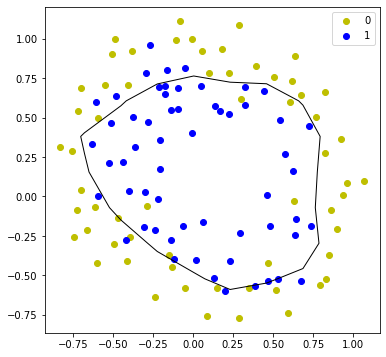

In [127]:
plt.figure(figsize=(6, 6))
plt.scatter(X[y == 0][0], X[y == 0][1], color='y', label='0')
plt.scatter(X[y == 1][0], X[y == 1][1], color='b', label='1')
plt.legend()

ax = plt.gca()
ax.autoscale(False)

probs = model.predict_prob(grid).reshape(xx1.shape)
#probs = model.predict_prob(pred_X).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black');
plt.show()

### Lambda = 1

In [128]:
model = LogisticRegression(lr=0.9, num_iter=150000, verbose=True, regularization=True, reg_lambdaa=1)
%time model.fit(X, y)

Iter: 0 loss: 0.682392235890326 	
Iter: 50000 loss: 0.5351602503808913 	
Iter: 100000 loss: 0.5351602503808913 	
CPU times: user 9.33 s, sys: 12.8 ms, total: 9.34 s
Wall time: 9.35 s


(2500, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app


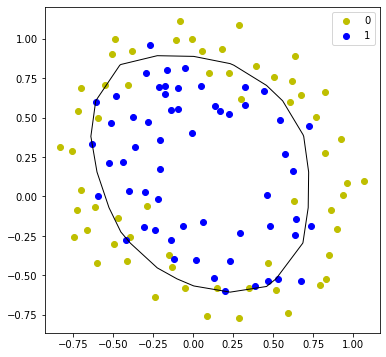

In [129]:
xx1, xx2 = np.meshgrid(np.linspace(X['0'].min()-5,X['0'].max()+5), np.linspace(X['1'].min()-5, X['1'].max()+5))
grid = np.c_[xx1.ravel(), xx2.ravel()]
print(grid.shape)

grid = np.zeros([2500,27])
grid[:,0]=xx1.ravel()
grid[:,1]=xx2.ravel()

for i in range(len(polynomial_features[2:])):
  grid[:,i+2] = (grid[:,0] ** polynomial_features[i][0])  * (grid[:,1] ** polynomial_features[i][1])

plt.figure(figsize=(6, 6))
plt.scatter(X[y == 0][0], X[y == 0][1], color='y', label='0')
plt.scatter(X[y == 1][0], X[y == 1][1], color='b', label='1')
plt.legend()

ax = plt.gca()
ax.autoscale(False)

probs = model.predict_prob(grid).reshape(xx1.shape)
#probs = model.predict_prob(pred_X).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black');
plt.show()

### Lambda = 100

In [136]:
model = LogisticRegression(lr=0.5, num_iter=150000, verbose=True, regularization=True, reg_lambdaa=30)
%time model.fit(X, y)

Iter: 0 loss: 0.6873765596963827 	
Iter: 50000 loss: 0.6747949583055147 	
Iter: 100000 loss: 0.6747949583055147 	
CPU times: user 9.33 s, sys: 12.9 ms, total: 9.35 s
Wall time: 9.34 s


(2500, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app


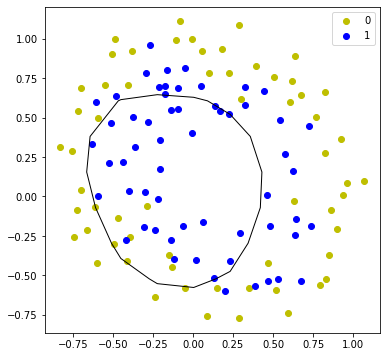

In [137]:
xx1, xx2 = np.meshgrid(np.linspace(X['0'].min()-5,X['0'].max()+5), np.linspace(X['1'].min()-5, X['1'].max()+5))
grid = np.c_[xx1.ravel(), xx2.ravel()]
print(grid.shape)

grid = np.zeros([2500,27])
grid[:,0]=xx1.ravel()
grid[:,1]=xx2.ravel()

for i in range(len(polynomial_features[2:])):
  grid[:,i+2] = (grid[:,0] ** polynomial_features[i][0])  * (grid[:,1] ** polynomial_features[i][1])

plt.figure(figsize=(6, 6))
plt.scatter(X[y == 0][0], X[y == 0][1], color='y', label='0')
plt.scatter(X[y == 1][0], X[y == 1][1], color='b', label='1')
plt.legend()

ax = plt.gca()
ax.autoscale(False)

probs = model.predict_prob(grid).reshape(xx1.shape)
#probs = model.predict_prob(pred_X).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black');
plt.show()